### РЕГРЕССИЯ

Оригинальный датасет: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Модели для обучения регрессии: 
* линейная регрессия
* логистическая регрессия
* дерево решений
* случайный лес
* xgboost
* градиентный бустинг

Файлы:
* test.csv - тестовые данные
* train.csv - тренировочные данные
* sample_submission.csv - цена для тестовых данных (с чем сверяемся)
* data_description.txt - описание признаков из таблиц

Описания колонок будет в отдельном словаре с переводом на русский

In [378]:
column_descriptions = {
    "SalePrice": "Цена продажи недвижимости в долларах (целевая переменная)",
    "MSSubClass": "Класс здания",
    "MSZoning": "Общая классификация зонирования",
    "LotFrontage": "Фасад участка (футов улицы, прилегающих к собственности)",
    "LotArea": "Площадь участка (в квадратных футах)",
    "Street": "Тип дорожного доступа",
    "Alley": "Тип доступа к переулку",
    "LotShape": "Общая форма участка",
    "LandContour": "Рельеф участка (насколько он ровный)",
    "Utilities": "Доступные коммунальные услуги",
    "LotConfig": "Конфигурация участка",
    "LandSlope": "Наклон участка",
    "Neighborhood": "Район (местоположение в пределах города Ames)",
    "Condition1": "Близость к главной дороге или железной дороге",
    "Condition2": "Близость ко второй главной дороге или железной дороге (если есть)",
    "BldgType": "Тип здания",
    "HouseStyle": "Стиль дома",
    "OverallQual": "Общая оценка качества материалов и отделки",
    "OverallCond": "Общая оценка состояния дома",
    "YearBuilt": "Год постройки",
    "YearRemodAdd": "Год реконструкции или добавления пристройки",
    "RoofStyle": "Тип крыши",
    "RoofMatl": "Материал крыши",
    "Exterior1st": "Внешняя отделка дома (первичный материал)",
    "Exterior2nd": "Внешняя отделка дома (вторичный материал, если есть)",
    "MasVnrType": "Тип каменной облицовки",
    "MasVnrArea": "Площадь каменной облицовки (в квадратных футах)",
    "ExterQual": "Качество внешней отделки",
    "ExterCond": "Текущее состояние внешней отделки",
    "Foundation": "Тип фундамента",
    "BsmtQual": "Высота потолков в подвале",
    "BsmtCond": "Общее состояние подвала",
    "BsmtExposure": "Наличие окон или выхода из подвала",
    "BsmtFinType1": "Качество отделки первой зоны подвала",
    "BsmtFinSF1": "Площадь первой зоны отделанного подвала",
    "BsmtFinType2": "Качество отделки второй зоны подвала (если есть)",
    "BsmtFinSF2": "Площадь второй зоны отделанного подвала",
    "BsmtUnfSF": "Площадь неотделанного подвала",
    "TotalBsmtSF": "Общая площадь подвала",
    "Heating": "Тип отопления",
    "HeatingQC": "Качество и состояние системы отопления",
    "CentralAir": "Наличие центрального кондиционирования",
    "Electrical": "Тип электропроводки",
    "1stFlrSF": "Площадь первого этажа",
    "2ndFlrSF": "Площадь второго этажа",
    "LowQualFinSF": "Площадь низкокачественной отделки (на всех этажах)",
    "GrLivArea": "Площадь жилых помещений над землей",
    "BsmtFullBath": "Количество полноценных ванных комнат в подвале",
    "BsmtHalfBath": "Количество половинных ванных комнат в подвале",
    "FullBath": "Количество полноценных ванных комнат выше подвала",
    "HalfBath": "Количество половинных ванных комнат выше подвала",
    "Bedroom": "Количество спален (выше уровня подвала)",
    "Kitchen": "Количество кухонь",
    "KitchenQual": "Качество кухни",
    "TotRmsAbvGrd": "Общее количество комнат выше уровня земли (без учета ванных комнат)",
    "Functional": "Функциональность дома (способность выполнять свою функцию)",
    "Fireplaces": "Количество каминов",
    "FireplaceQu": "Качество камина",
    "GarageType": "Тип гаража (расположение)",
    "GarageYrBlt": "Год постройки гаража",
    "GarageFinish": "Внутренняя отделка гаража",
    "GarageCars": "Вместимость гаража (в автомобилях)",
    "GarageArea": "Площадь гаража (в квадратных футах)",
    "GarageQual": "Качество гаража",
    "GarageCond": "Состояние гаража",
    "PavedDrive": "Асфальтированный подъезд",
    "WoodDeckSF": "Площадь деревянной террасы",
    "OpenPorchSF": "Площадь открытой веранды",
    "EnclosedPorch": "Площадь закрытой веранды",
    "3SsnPorch": "Площадь трехсезонной веранды",
    "ScreenPorch": "Площадь веранды с москитной сеткой",
    "PoolArea": "Площадь бассейна",
    "PoolQC": "Качество бассейна",
    "Fence": "Качество забора",
    "MiscFeature": "Дополнительные особенности дома (не включенные в другие категории)",
    "MiscVal": "Денежная стоимость дополнительных особенностей",
    "MoSold": "Месяц продажи",
    "YrSold": "Год продажи",
    "SaleType": "Тип продажи",
    "SaleCondition": "Условия продажи"
}


#### 1. Обработка данных

In [379]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [380]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [381]:
test_data = pd.read_csv(r'C:\pet projects\pet-projects\houseprice\data\train.csv')
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [382]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [383]:
missing_cols = test_data.isna().sum()
missing_cols_name = missing_cols[missing_cols > 0].index
missing_info_df = pd.DataFrame({
    "missing_count": missing_cols[missing_cols > 0],
    "description": [column_descriptions[col] for col in missing_cols_name],
    "types": [test_data[col].dtype for col in missing_cols_name]
})
missing_info_df

,missing_count,description,types
LotFrontage,259,"Фасад участка (футов улицы, прилегающих к собс...",float64
Alley,1369,Тип доступа к переулку,object
MasVnrType,872,Тип каменной облицовки,object
MasVnrArea,8,Площадь каменной облицовки (в квадратных футах),float64
BsmtQual,37,Высота потолков в подвале,object
BsmtCond,37,Общее состояние подвала,object
BsmtExposure,38,Наличие окон или выхода из подвала,object
BsmtFinType1,37,Качество отделки первой зоны подвала,object
BsmtFinType2,38,Качество отделки второй зоны подвала (если есть),object
Electrical,1,Тип электропроводки,object


Начнём работать с пропущенными значениями

In [384]:
test_data.LotFrontage.replace(np.nan, 0, inplace=True)
test_data.GarageYrBlt.replace(np.nan, 0, inplace=True)
test_data.MasVnrArea.replace(np.nan, 0, inplace=True)

In [385]:
test_data = test_data.dropna(subset=['Electrical'])

cols_with_missing = test_data.columns[(test_data.isna().sum() < 100) & (test_data.isna().sum() > 0)]

test_data = test_data.dropna(subset=cols_with_missing)

In [386]:
test_data = test_data.drop(columns=['MiscFeature'])

In [387]:
missing_cols = test_data.isna().sum()
missing_cols_name = missing_cols[missing_cols > 0].index
missing_info_df = pd.DataFrame({
    "missing_count": missing_cols[missing_cols > 0],
    "description": [column_descriptions[col] for col in missing_cols_name],
    "types": [test_data[col].dtype for col in missing_cols_name]
})
missing_info_df

,missing_count,description,types
Alley,1264,Тип доступа к переулку,object
MasVnrType,771,Тип каменной облицовки,object
FireplaceQu,595,Качество камина,object
PoolQC,1339,Качество бассейна,object
Fence,1085,Качество забора,object


In [388]:
test_data['Alley'].fillna('Not Allowed', inplace=True)

Оставим NaN значения, поскольку большую часть занимают из тестового датасета

#### 2. Определение признаков

In [389]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   Alley          1346 non-null   object 
 7   LotShape       1346 non-null   object 
 8   LandContour    1346 non-null   object 
 9   Utilities      1346 non-null   object 
 10  LotConfig      1346 non-null   object 
 11  LandSlope      1346 non-null   object 
 12  Neighborhood   1346 non-null   object 
 13  Condition1     1346 non-null   object 
 14  Condition2     1346 non-null   object 
 15  BldgType       1346 non-null   object 
 16  HouseStyle     1346 non-null   object 
 17  OverallQual    1346 non-null   int64  
 18  OverallCond  

Построим матрицу корреляции c количественными значениями и посмотрим на взаимодействие с SalePrice

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Тепловая карта матрицы корреляции взаимодействия с SalePrice')

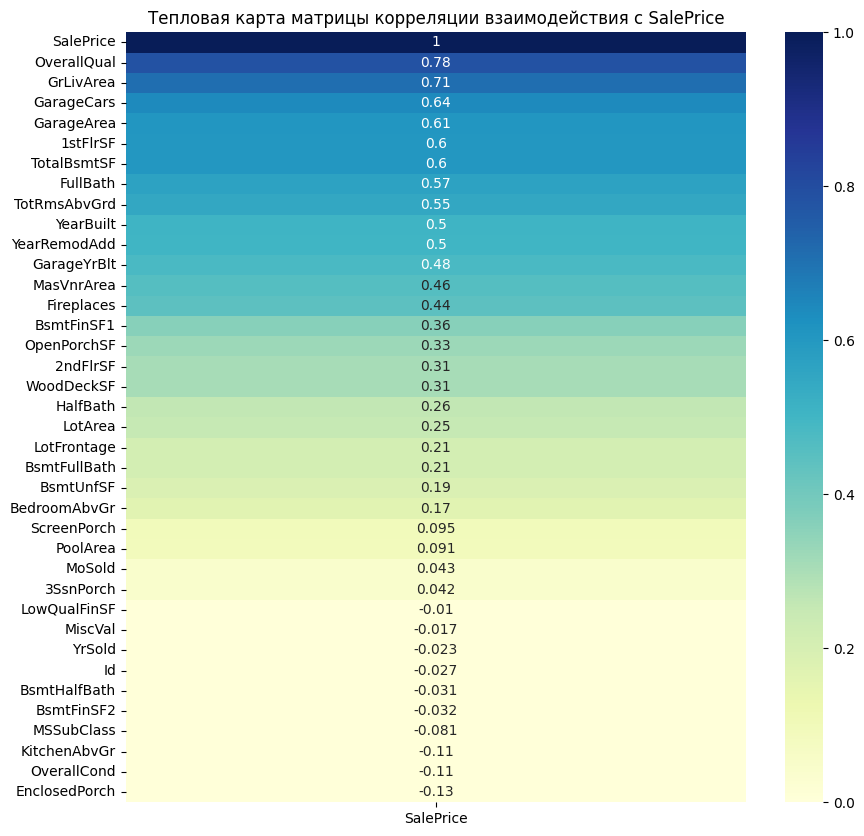

In [391]:
corr_saleprice = test_data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_saleprice.to_frame(), annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Тепловая карта матрицы корреляции взаимодействия с SalePrice")

Пусть наше порового значение будет 0.2 => отбросим столбцы, у которых значений корреляции меньше 0.2

In [392]:
low_corr_columns = corr_saleprice[corr_saleprice < 0.2].index.tolist()
test_data.drop(low_corr_columns, axis=1, inplace=True)

Проанализируем распределение данных по каждой категориальной переменной с помощью многофакторного ANOVA

Сначала уберем те признаки, в которых распределение данных неравномерно

In [393]:
category_columns = test_data.select_dtypes(include='object')

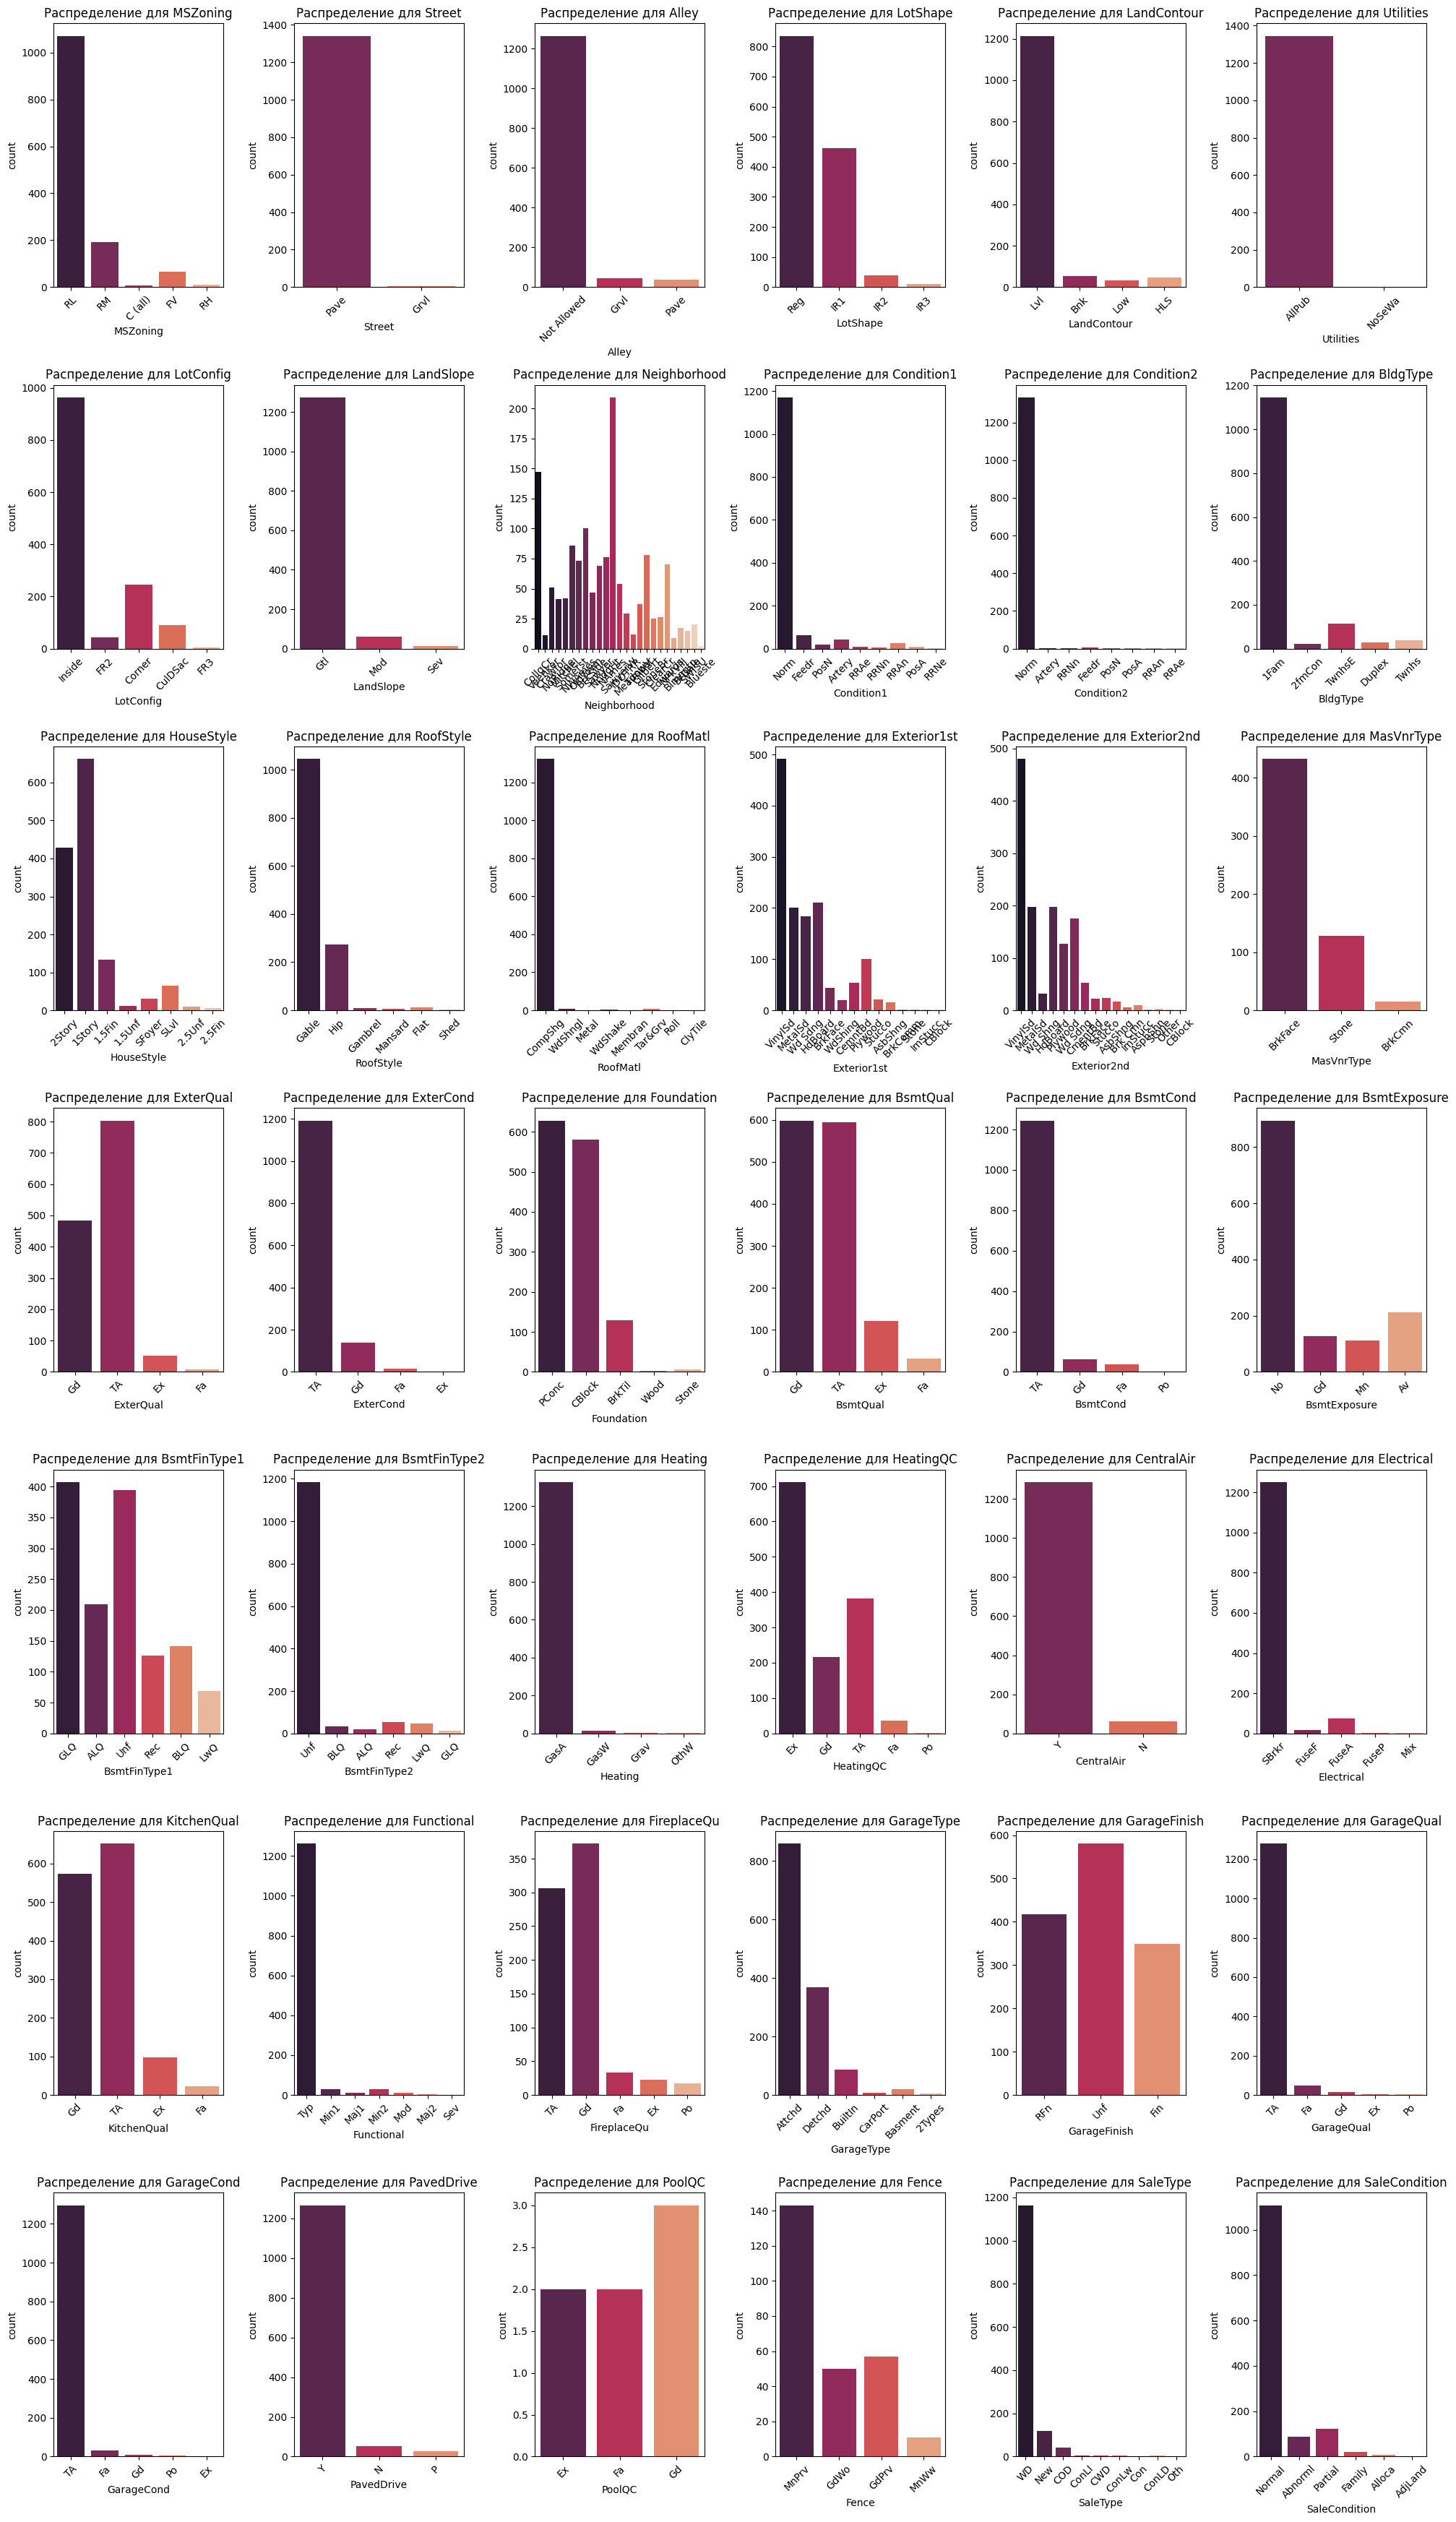

In [394]:
category_columns = test_data.select_dtypes(include='object')

n_cols = 6  
n_rows = (len(category_columns.columns) // n_cols) + (1 if len(category_columns.columns) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(category_columns.columns):
    sns.countplot(data=test_data, x=col, ax=axes[i], palette='rocket', hue=col, legend=False)
    axes[i].set_title(f'Распределение для {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

По гистограммам видно, какие можно отбросить категориальные признаки по тому, как распределены данные - если практически все в одной группе из категории - не берём этот признак

Признаки: 
Street, Utilities, Condition2, RoofMatl, Heating, GarageCond

In [395]:
test_data.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond'], inplace=True)
category_columns = test_data.select_dtypes(include='object')

In [396]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Отдельно ANOVA для каждого категориального признака с переменной

In [397]:
import numpy as np
from scipy import stats

cat_features = test_data.select_dtypes(include=['object', 'category']).columns
target = 'SalePrice'

anova_results = {}

for feature in cat_features:
    groups = [test_data[test_data[feature] == cat][target] for cat in test_data[feature].dropna().unique()]
    
    if len(groups) > 1:  
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[feature] = {'F-stat': f_stat, 'p-value': p_value}

significant_features = {k: v for k, v in anova_results.items() if v['p-value'] < 0.05}
sorted_features = sorted(significant_features.items(), key=lambda x: x[1]['F-stat'], reverse=True)

print("Значимые категориальные признаки:")
for feature, values in sorted_features:
    print(f"{feature}: F = {np.round(values['F-stat'], 1)}, p = {np.round(values['p-value'], 5)}")


Значимые категориальные признаки:
ExterQual: F = 385.2, p = 0.0
BsmtQual: F = 371.3, p = 0.0
KitchenQual: F = 363.8, p = 0.0
GarageFinish: F = 238.5, p = 0.0
Foundation: F = 105.3, p = 0.0
HeatingQC: F = 76.8, p = 0.0
BsmtExposure: F = 71.6, p = 0.0
GarageType: F = 67.1, p = 0.0
BsmtFinType1: F = 64.9, p = 0.0
Neighborhood: F = 61.6, p = 0.0
CentralAir: F = 55.8, p = 0.0
SaleCondition: F = 40.8, p = 0.0
MSZoning: F = 38.9, p = 0.0
LotShape: F = 34.6, p = 0.0
MasVnrType: F = 29.2, p = 0.0
SaleType: F = 26.8, p = 0.0
FireplaceQu: F = 23.7, p = 0.0
PavedDrive: F = 23.0, p = 0.0
Exterior1st: F = 19.6, p = 0.0
Exterior2nd: F = 17.2, p = 0.0
Electrical: F = 16.8, p = 0.0
HouseStyle: F = 16.7, p = 0.0
RoofStyle: F = 16.6, p = 0.0
Alley: F = 14.7, p = 0.0
LandContour: F = 12.6, p = 0.0
BsmtCond: F = 11.7, p = 0.0
GarageQual: F = 9.9, p = 0.0
BldgType: F = 8.8, p = 0.0
LotConfig: F = 6.7, p = 3e-05
ExterCond: F = 6.6, p = 0.0002
Condition1: F = 5.1, p = 0.0
Fence: F = 4.1, p = 0.00756
BsmtFinTy

Среди них самые значимые: 
* ExterQual: F = 385.2, p = 0.0
* BsmtQual: F = 371.3, p = 0.0
* KitchenQual: F = 363.8, p = 0.0
* GarageFinish: F = 238.5, p = 0.0
* Foundation: F = 105.3, p = 0.0
* FireplaceQu: F = 101.2, p = 0.0
* MasVnrType: F = 88.7, p = 0.0
* HeatingQC: F = 76.8, p = 0.0
* BsmtExposure: F = 71.6, p = 0.0
* GarageType: F = 67.1, p = 0.0

Видно, что у каждого категориального признака p-value < 0.05 => мы не можем отбросить их


Посмотрим через критерий Крускала-Уоллиса

In [398]:
from scipy.stats import kruskal

kruskal_results = []

for feature in cat_features:
    groups = [test_data[test_data[feature] == cat]['SalePrice'] for cat in test_data[feature].unique()]
    
    if len(groups) > 1:
        h_stat, p_value = kruskal(*groups)
        kruskal_results.append((feature, h_stat, p_value))

kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H-statistic', 'p-value'])

significant_features = kruskal_df[kruskal_df['p-value'] < 0.05].sort_values(by='H-statistic', ascending=False)

print("Значимые признаки (Краскела-Уоллиса):")
print(significant_features)

Значимые признаки (Краскела-Уоллиса):
          Feature  H-statistic        p-value
6    Neighborhood   782.426984  1.061424e-149
14      ExterQual   619.266055  6.709081e-134
17       BsmtQual   610.521767  5.276951e-132
25    KitchenQual   599.792733  1.117702e-129
29   GarageFinish   486.191443  2.659926e-106
16     Foundation   432.412455   2.752332e-92
28     GarageType   399.022166   4.819622e-84
22      HeatingQC   325.153731   4.050292e-69
20   BsmtFinType1   295.745050   8.229459e-62
11    Exterior1st   295.364883   2.242778e-55
12    Exterior2nd   284.711395   8.330214e-52
0        MSZoning   251.617428   2.918225e-53
9      HouseStyle   163.954083   4.718029e-32
35  SaleCondition   152.102257   4.764028e-31
34       SaleType   150.232542   1.753582e-28
19   BsmtExposure   141.271281   2.010668e-30
2        LotShape   134.692326   5.269066e-29
24     Electrical    98.748351   1.816670e-20
23     CentralAir    84.501412   3.839406e-20
7      Condition1    66.358157   2.598811e

Среди них самые значимые: 
* ExterQual   619.266055  6.709081e-134
* BsmtQual   610.521767  5.276951e-132
* KitchenQual   599.792733  1.117702e-129
* GarageFinish   486.191443  2.659926e-106
* Neighborhood   456.314804   9.394497e-92
* Foundation   432.412455   2.752332e-92
* GarageType   399.022166   4.819622e-84
* FireplaceQu   392.416699   1.278063e-82
* HeatingQC   325.153731   4.050292e-69
* BsmtFinType1   295.745050   8.229459e-62

В итоге оставим следующие значения: 
* ExterQual
* BsmtQual
* KitchenQual
* GarageFinish
* Foundation
* FireplaceQu
* MasVnrType
* HeatingQC
* BsmtExposure
* GarageType
* Neighborhood
* BsmtFinType1 

In [399]:
significant_columns = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'Foundation',
    'FireplaceQu', 'MasVnrType', 'HeatingQC', 'BsmtExposure', 'GarageType',
    'Neighborhood', 'BsmtFinType1'
]

cat_features = test_data.select_dtypes(include=['object', 'category']).columns
non_significant_columns = [col for col in cat_features if col not in significant_columns]

test_data.drop(non_significant_columns, axis=1, inplace=True)

In [400]:
test_data.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,CollgCr,7,2003,2003,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,856,Ex,856,854,1710,1,2,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,208500
1,80.0,9600,Veenker,6,1976,1976,NaN,0.0,TA,CBlock,Gd,Gd,ALQ,978,1262,Ex,1262,0,1262,0,2,0,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,181500
2,68.0,11250,CollgCr,7,2001,2002,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,920,Ex,920,866,1786,1,2,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,223500
3,60.0,9550,Crawfor,7,1915,1970,NaN,0.0,TA,BrkTil,TA,No,ALQ,216,756,Gd,961,756,1717,1,1,0,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,140000
4,84.0,14260,NoRidge,8,2000,2000,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,1145,Ex,1145,1053,2198,1,2,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,250000


В итоге полученные признаки из датасета для обучения модели:

In [401]:
test_data.columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

#### 3. Обучение моделей

Продублируем модели для обучения: 
* линейная регрессия
* дерево решений
* случайный лес
* xgboost
* градиентный бустинг

Возьмём данные в соотношении 80/20 для обучения и теста на test.csv

In [402]:
from sklearn.model_selection import train_test_split

In [410]:
y = test_data['SalePrice']
X = test_data.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Наши метрики для анализа работы моделей:
 *	Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
 *	Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
 *	Коэффициент детерминации
 *	Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
 *	Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)
 *	Cимметричная MAPE (англ. Symmetric MAPE, SMAPE)
 *	Средняя абсолютная масштабированная ошибка (англ. Mean absolute scaled error, MASE)

In [411]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def symmetric_mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100

def mean_absolute_scaled_error(y_test, y_pred):
    n = len(y_test)
    scale = np.mean(np.abs(np.diff(y_test)))
    return np.mean(np.abs(y_test - y_pred)) / scale

def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

##### 3.1 Линейная регрессия

In [412]:
from sklearn.linear_model import LinearRegression

In [423]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

X_train.replace('None', np.nan, inplace=True)
X_test.replace('None', np.nan, inplace=True)

X_train.fillna(X_train.mean(numeric_only=True), inplace=True)
X_test.fillna(X_train.mean(numeric_only=True), inplace=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [424]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 348 to 744
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1076 non-null   float64
 1   LotArea               1076 non-null   int64  
 2   OverallQual           1076 non-null   int64  
 3   YearBuilt             1076 non-null   int64  
 4   YearRemodAdd          1076 non-null   int64  
 5   MasVnrArea            1076 non-null   float64
 6   BsmtFinSF1            1076 non-null   int64  
 7   TotalBsmtSF           1076 non-null   int64  
 8   1stFlrSF              1076 non-null   int64  
 9   2ndFlrSF              1076 non-null   int64  
 10  GrLivArea             1076 non-null   int64  
 11  BsmtFullBath          1076 non-null   int64  
 12  FullBath              1076 non-null   int64  
 13  HalfBath              1076 non-null   int64  
 14  TotRmsAbvGrd          1076 non-null   int64  
 15  Fireplaces            107

In [429]:
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

y_pred = lr_model.predict(X_test_encoded)

In [430]:
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
smape_lr = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lr = mean_absolute_scaled_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R2 Score: {r2_lr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr}")
print(f"Symmetric MAPE (SMAPE): {smape_lr}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")


Mean Squared Error (MSE): 2058283132.2744706
Mean Absolute Error (MAE): 20141.380555154374
R2 Score: 0.6706416629476821
Mean Absolute Percentage Error (MAPE): 12.201779445846528
Symmetric MAPE (SMAPE): 10.721628474477027
Mean Absolute Scaled Error (MASE): 0.2558371842951314
Root Mean Squared Error (RMSE): 45368.30537142059


Mean Squared Error (MSE): 2363235499.78
Это достаточно большая ошибка, так как MSE чувствительна к большим отклонениям. Меньшее значение MSE указывает на лучшее качество модели.

Mean Absolute Error (MAE): 21789.1
Это означает, что в среднем ошибка модели составляет около 21,789 единиц. Если в вашем наборе данных это значительная величина, то это может быть приемлемо, но если ваши данные масштабируются к более мелким значениям, то это будет большой ошибкой.

R² Score: 0.62
Значение R² в 0.62 указывает на то, что модель объясняет 62% вариативности данных. Это довольно хорошее значение для большинства регрессионных задач, но все зависит от контекста. Чем ближе R² к 1, тем лучше модель объясняет данные.

Mean Absolute Percentage Error (MAPE): 13.28%
Это значение указывает, что средняя ошибка в процентах составляет около 13%. Для многих задач это хороший результат, но в зависимости от области, где требуется высокая точность, это может быть слишком большим.

Symmetric MAPE (SMAPE): 11.72%
SMAPE аналогична MAPE, но с учетом симметрии. Это значение также выглядит хорошим, так как оно немного меньше MAPE, что означает, что модель делает более сбалансированные ошибки в обоих направлениях (предсказанные и истинные значения).

Mean Absolute Scaled Error (MASE): 0.28
Это показатель того, насколько ваша модель эффективнее базового метода (например, просто использующего среднее значение). MASE меньше 1 обычно означает, что модель хорошая. В вашем случае 0.28 указывает на то, что модель работает значительно лучше базового метода.

Root Mean Squared Error (RMSE): 48613.12
Это еще один показатель ошибки, который выражается в тех же единицах, что и данные. Он похож на MSE, но более интерпретируем, так как не является квадратом величины. RMSE также достаточно велико, но сравнив это значение с масштабом ваших данных, можно сделать вывод о том, является ли это приемлемым.

###### 3.1.1 Полиномиальная регрессия

Здесь нужно преобразовать данные в полиномиальные

In [361]:
from sklearn.preprocessing import PolynomialFeatures

In [431]:
poly = PolynomialFeatures(degree=1)  
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

In [432]:
mse_plr = mean_squared_error(y_test, y_pred)
mae_plr = mean_absolute_error(y_test, y_pred)
r2_plr = r2_score(y_test, y_pred)
mape_plr = mean_absolute_percentage_error(y_test, y_pred)
smape_plr = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_plr = mean_absolute_scaled_error(y_test, y_pred)
rmse_plr = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_plr}")
print(f"Mean Absolute Error (MAE): {mae_plr}")
print(f"R2 Score: {r2_plr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_plr}")
print(f"Symmetric MAPE (SMAPE): {smape_plr}")
print(f"Mean Absolute Scaled Error (MASE): {mase_plr}")
print(f"Root Mean Squared Error (RMSE): {rmse_plr}")

Mean Squared Error (MSE): 2058283132.2742345
Mean Absolute Error (MAE): 20141.380555156356
R2 Score: 0.6706416629477199
Mean Absolute Percentage Error (MAPE): 12.201779445847484
Symmetric MAPE (SMAPE): 10.721628474478038
Mean Absolute Scaled Error (MASE): 0.2558371842951566
Root Mean Squared Error (RMSE): 45368.30537141799


Использование полиномиальной регрессии тоже ни к чему не привело (логично, ибо степень полинома= = 1 и если увеличить, резултат ухудшится)

###### 3.1.2 Регрессия с L1-регуляризацией (Lasso)

In [433]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_encoded, y_train)

y_pred = 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+11, tolerance: 6.713e+08
  model = cd_fast.enet_coordinate_descent(


In [436]:
mse_lasso = mean_squared_error(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"R2 Score: {r2_lasso}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")

Mean Squared Error (MSE): 2058174682.5683494
Mean Absolute Error (MAE): 20132.053753981992
R2 Score: 0.6706590166413027
Mean Absolute Percentage Error (MAPE): 12.193068561800231
Symmetric MAPE (SMAPE): 10.713514937963732
Mean Absolute Scaled Error (MASE): 0.25571871463294077
Root Mean Squared Error (RMSE): 45367.11014125045


Результаты чуть лучше

###### 3.1.3 Регрессия с L2-регуляризацией (Ridge)

In [437]:
from sklearn.linear_model import Ridge

In [445]:
ridge_model = Ridge(alpha=1.0)  # alpha можно настроить для регулировки силы регуляризации

ridge_model.fit(X_train_encoded, y_train)

y_pred = ridge_model.predict(X_test_encoded)


In [446]:
mse_ridge = mean_squared_error(y_test, y_pred)
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred)
smape_ridge = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_ridge = mean_absolute_scaled_error(y_test, y_pred)
rmse_ridge = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R2 Score: {r2_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}")
print(f"Symmetric MAPE (SMAPE): {smape_ridge}")
print(f"Mean Absolute Scaled Error (MASE): {mase_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")

Mean Squared Error (MSE): 2063713406.1345675
Mean Absolute Error (MAE): 19960.283205161155
R2 Score: 0.6697727319729994
Mean Absolute Percentage Error (MAPE): 12.072928124844205
Symmetric MAPE (SMAPE): 10.601926546228302
Mean Absolute Scaled Error (MASE): 0.2535368734510608
Root Mean Squared Error (RMSE): 45428.11250904628


На том же уровне


###### 3.1.4 Улучшение линейной модели 

Будем теперь обучать линейную регрессию с L1-регуализацией и дополнительными параметрами.

Воспользуемся кросс-валидацией для выбора наилучшего параметра альфа


In [447]:
from sklearn.linear_model import LassoCV

In [451]:
# Увеличим число иттераций для уменьшения проблемы схождения данных в иттерации
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, max_iter=10000)
lasso_cv_model.fit(X_train_encoded, y_train)

print("Best alpha:", lasso_cv_model.alpha_)

Best alpha: 10.0


In [452]:
y_pred = lasso_cv_model.predict(X_test_encoded)

In [453]:
mse_lasso_cv = mean_squared_error(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
r2_lasso_cv = r2_score(y_test, y_pred)
mape_lasso_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R2 Score: {r2_lasso_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv}")

Mean Squared Error (MSE): 2059908743.9872766
Mean Absolute Error (MAE): 19961.626657565703
R2 Score: 0.6703815389822143
Mean Absolute Percentage Error (MAPE): 12.066089860250576
Symmetric MAPE (SMAPE): 10.599125398706242
Mean Absolute Scaled Error (MASE): 0.2535539380747827
Root Mean Squared Error (RMSE): 45386.21755541297


Попробуем стандартизировать данные 

In [454]:
from sklearn.preprocessing import StandardScaler

In [455]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [457]:
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, max_iter=10000)
lasso_cv_model.fit(X_train_scaled, y_train)

y_pred = lasso_cv_model.predict(X_test_scaled)

In [459]:
mse_lasso_cv = mean_squared_error(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
r2_lasso_cv = r2_score(y_test, y_pred)
mape_lasso_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R2 Score: {r2_lasso_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv}")

Mean Squared Error (MSE): 2054866975.4256613
Mean Absolute Error (MAE): 20078.946358003832
R2 Score: 0.6711883028735461
Mean Absolute Percentage Error (MAPE): 12.159501989502882
Symmetric MAPE (SMAPE): 10.67851184699324
Mean Absolute Scaled Error (MASE): 0.2550441408809036
Root Mean Squared Error (RMSE): 45330.64058035868


Результат улучшился немного

Попробуем воспользоваться сеткой для определения лучших гиперпараметров

In [460]:
from sklearn.model_selection import GridSearchCV

In [465]:
param_grid = {
    'alphas': [[0.001, 0.01, 0.1, 1, 10]],
    'max_iter': [1000, 5000, 10000, 20000],
    'tol': [1e-4, 1e-5, 1e-6]
}


grid_search = GridSearchCV(LassoCV(cv=5), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607492348.8758545, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28945844564.619263, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38913145336.275085, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: 

Best parameters found:  {'alphas': [0.001, 0.01, 0.1, 1, 10], 'max_iter': 5000, 'tol': 1e-06}


In [470]:
y_pred = grid_search.predict(X_test_encoded)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [471]:
mse_lasso_cv = mean_squared_error(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
r2_lasso_cv = r2_score(y_test, y_pred)
mape_lasso_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R2 Score: {r2_lasso_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv}")

Mean Squared Error (MSE): 1.7356874263256982e+16
Mean Absolute Error (MAE): 115768823.76276067
R2 Score: -2777377.4636982516
Mean Absolute Percentage Error (MAPE): 67849.32968686041
Symmetric MAPE (SMAPE): 199.34787825015897
Mean Absolute Scaled Error (MASE): 1470.5034652177537
Root Mean Squared Error (RMSE): 131745490.48546968


Полученная модель плохо себя показала, видимо можно было использовать обычную линейную регрессию без настройки гиперпараметров

In [472]:
##### 3.2 Логистическая регрессия